In [2]:
from scripts.load_data import load_train, load_test, load_example


import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
import numpy as np

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

## Image recognition met een "normaal" neuraal netwerk. 

Neurale netwerken zijn ontzettend sterke wiskundige modellen. Een “normaal” neuraal netwerk heeft echter wel wat limieten. Om een aantal van deze limieten te doorbreken, kan je een convolutional neuraal netwerk gebruiken. 

We beginnen met het exploreren van de limieten van normale neurale netwerken, dit doen we doormiddel van de MNIST-dataset.

MNIST is een dataset van 70.000 handgeschreven cijfers (0..9), opgesplitst in 60.000 training images en 10.000 testing images. We hebben al functies geschreven waarmee je de data kan inladen, zie de cell hieronder.

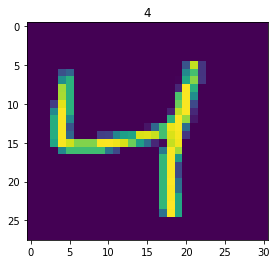

In [3]:
X_train, y_train = load_train()
X_train = (X_train / 255) - 0.5

plt.imshow(X_train[2])
plt.title(f"{y_train[2]}")
plt.show()

Dit is, uiteraard, een vier.

### Data formatting
Voordat we een neuraal netwerk kunnen trainen op de MNIST-data, moet deze verwerkt worden. De input van dit neuraal netwerk moet 1-dimensionaal zijn, momenteel is dat nog 2-dimensionaal. De labels hebben wij zelf al voor je verwerkt, probeer nu zelf X_train om te zetten naar een correct format.

In [4]:
y_train = to_categorical(y_train, 10)
# X_train = # FIXME Zet mij in de goede vorm
X_train = X_train.reshape(X_train.shape[0], X_train[0].size) # REMOVE ME

In [5]:
print(y_train.shape)
print(X_train.shape)

(60000, 10)
(60000, 868)


Image recognition geeft in het algemeen ontzettend grote input vectors. MNIST is in grayscale, maar veel plaatjes zijn dat niet. Als je ook nog kleur wil meegeven, zou de input vector nog drie keer zo groot zijn.

### Bouwen van een NN

De volgende stap is om een neuraal netwerk te bouwen. Maak zelf de eerste Dense layer af, kijk vervolgens ook naar hoeveel hidden layers je toevoegt. Bij image recognition is de activation function ook erg belangrijk. Denk goed na over welke je gebruikt. De laatste layer geven wij alvast aan je. 


In [6]:
model = Sequential()
# input_dimensions equals the size of a single image
# model.add(Dense(32, input_dim=)) # FIXME
model.add(Dense(32, input_dim=X_train[0].size, activation="sigmoid")) #REMOVE ME
model.add(Dense(64, activation="sigmoid")) #REMOVE ME
model.add(Dense(64, activation="sigmoid")) #REMOVE ME
model.add(Dense(10, activation="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                27808     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 34,730
Trainable params: 34,730
Non-trainable params: 0
_________________________________________________________________


Hieruit kan je al direct het eerste probleem van normale neurale netwerken inzien; er is een gigantische hoeveelheid trainbare parameters. 

Iedere node moet verbonden zijn aan iedere node. Bij image recognition is de input vector gigantisch, dit houdt dus ook in dat er een gigantische hoeveelheid weights zijn waarmee jouw neuraal netwerk rekening moet houden. 

Dit maakt het trainen best zwaar en langzaam. Ga nu door met het trainen van dit neuraal netwerk. Ook de `.compile()` hebben wij al aan je geven, ook hier mag je mee spelen.

Probeer jouw neuraal netwerk zo accuraat mogelijk te maken. (doe dit door te kijken naar de resultaten van de `.fit()`, `.evaluate()` komt later).

In [7]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(X_train, y_train, epochs=10) #REMOVE ME
# model.fit(X_train, y_train, epochs=) # FIXME set epochs

Epoch 1/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.8288 - acc: 0.7524
Epoch 2/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.3120 - acc: 0.9078
Epoch 3/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.2381 - acc: 0.9302
Epoch 4/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.1997 - acc: 0.9412
Epoch 5/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.1757 - acc: 0.9478
Epoch 6/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.1617 - acc: 0.9515
Epoch 7/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.1483 - acc: 0.9552
Epoch 8/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.1386 - acc: 0.9586
Epoch 9/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.1304 - acc: 0.9607
Epoch 10/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.1232 - acc: 0.9626

### Het evalueren van het neurale netwerk
Ook hier moet de data eerst nog omgevormd worden, gebruik hiervoor dezelfde code als bij de training data.

In [9]:
X_test, y_test = load_test()
# X_test = # FIXME
X_test = X_test.reshape(X_test.shape[0], X_test[0].size) # REMOVE ME
y_test = to_categorical(y_test, 10)

In [10]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 27us/step


[3.4450895652770996, 0.428]

### Huh?
Hoogstwaarschijnlijk scoort jouw neuraal netwerk nu ontzettend slecht. Om een limiet van neurale netwerken zichtbaar te maken, hebben we een klein beetje valsgespeeld. We hebben wat padding toegevoegd; een aantal pixels aan de linkerkant bij de testing data en een aantal pixels aan de rechterkant bij de training data. Zie de plots hieronder.

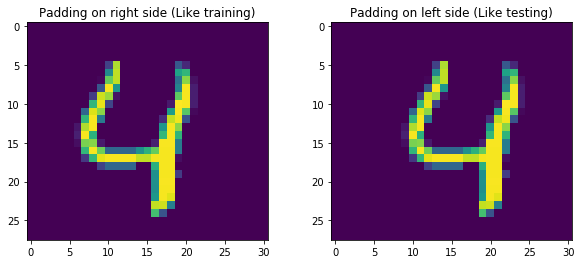

In [11]:
(example_r, example_l), label = load_example()
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].imshow(example_r)
axs[0].set_title("Padding on right side (Like training)")

axs[1].imshow(example_l)
axs[1].set_title("Padding on left side (Like testing)")

plt.show()

De standaardwaarde voor de padding is 3(!!) pixels, dit heeft een gigantisch effect op de accuratesse. Formatteer nog één keer de data (`examples`), en kijk wat er uit de `.predict()` komt. 

Er bestaat een kans dat jouw model hier de goede voorspelt, probeer dan bij `load_example()` het argument `index` te veranderen naar een ander getal. Waarschijnlijk zal het dan wel fout voorspellen


In [12]:
examples = np.array([example_r, example_l]).reshape(2, example_r.size) # DELETE ME
# examples = np.array([example_r, example_l]) # FIXME

In [13]:
model.predict_classes(examples)

array([4, 4])

### Waarom?

De voorspellingen van een gewoon neuraal netwerk zijn ruimtelijk bepaald, het herkent patronen op specifieke plekken. Het verplaatsen van deze patronen met maar een paar pixels kan al genoeg zijn om het onmogelijk te maken voor een gewoon neuraal netwerk om deze te herkennen. 

Een neuraal netwerk getraind op het herkennen van honden en fietsen, zou heel makkelijk het volgende gedrag kunnen laten zien:



![Right!](src/top-left-dog.png)

![Wrong!](src/top-left-bike.png)


Speel is een beetje rond met de padding, kijk is hoeveel impact 4 pixels heeft, zelfs 1 pixel kan al een grote impact hebben!

Wij raden aan om alleen de horizontale padding te veranderen, het format van het padding argument is dan: `((0, 0), (0, 0), (left sided padding, right sided padding))`.